In [3]:
import pandas as pd
intraday_trade_log=pd.read_csv('banknifty_short_straddle_920_1510_20%.csv')

In [4]:
intraday_trade_log

Entry_Datetime  Future_Traded_Price    ATM  Days_to_Expiry  \
0    2019-01-01 09:20:00             27265.00  27300               2   
1    2019-01-02 09:20:00             27437.90  27400               1   
2    2019-01-03 09:20:00             27218.90  27200               0   
3    2019-01-04 09:20:00             27188.45  27200               6   
4    2019-01-07 09:20:00             27530.00  27500               3   
..                   ...                  ...    ...             ...   
433  2020-10-14 09:20:00             23336.55  23400               1   
434  2020-10-15 09:20:00             23727.10  23700               0   
435  2020-10-16 09:20:00             23377.90  23300               6   
436  2020-10-19 09:20:00             23875.00  23800               3   
437  2020-10-20 09:20:00             24118.10  24100               2   

                       CE_Symbol  CE_Entry_Price  CE_Exit_Price  \
0    BANKNIFTY03JAN1927300CE.NFO          100.00         120.00   
1    BANKNIFTY03JAN1927400CE.NFO           99.05         118.86   
2    BANKNIFTY03JAN1927200CE.NFO           48.10          57.72   
3    BANKNIFTY10JAN1927200CE.NFO          179.60         215.52   
4    BANKNIFTY10JAN1927500CE.NFO          137.75          82.35   
..                           ...             ...            ...   
433  BANKNIFTY15OCT2023400CE.NFO          223.25         267.90   
434  BANKNIFTY15OCT2023700CE.NFO          132.00         158.40   
435  BANKNIFTY22OCT2023300CE.NFO          459.60         551.52   
436  BANKNIFTY22OCT2023800CE.NFO          391.20         469.44   
437  BANKNIFTY22OCT2024100CE.NFO          330.00         396.00   

        CE_Exit_Datetime                    PE_Symbol  PE_Entry_Price  \
0    2019-01-01 14:31:00  BANKNIFTY03JAN1927300PE.NFO          225.60   
1    2019-01-02 10:21:00  BANKNIFTY03JAN1927400PE.NFO          157.55   
2    2019-01-03 09:38:00  BANKNIFTY03JAN1927200PE.NFO          135.30   
3    2019-01-04 11:41:00  BANKNIFTY10JAN1927200PE.NFO          283.05   
4    2019-01-07 15:10:00  BANKNIFTY10JAN1927500PE.NFO          204.00   
..                   ...                          ...             ...   
433  2020-10-14 14:20:00  BANKNIFTY15OCT2023400PE.NFO          317.75   
434  2020-10-15 09:37:00  BANKNIFTY15OCT2023700PE.NFO          133.70   
435  2020-10-16 12:05:00  BANKNIFTY22OCT2023300PE.NFO          392.90   
436  2020-10-19 09:45:00  BANKNIFTY22OCT2023800PE.NFO          329.75   
437  2020-10-20 09:25:00  BANKNIFTY22OCT2024100PE.NFO          340.00   

     PE_Exit_Price     PE_Exit_Datetime     PnL  
0           270.72  2019-01-01 09:54:00  -65.12  
1           189.06  2019-01-02 09:35:00  -51.32  
2           162.36  2019-01-03 11:36:00  -36.68  
3           339.66  2019-01-04 09:45:00  -92.53  
4           244.80  2019-01-07 14:45:00   14.60  
..             ...                  ...     ...  
433          55.70  2020-10-14 15:10:00  217.40  
434         160.44  2020-10-15 13:45:00  -53.14  
435         471.48  2020-10-16 09:52:00 -170.50  
436         147.75  2020-10-19 15:10:00  103.76  
437         205.75  2020-10-20 15:10:00   68.25  

[438 rows x 13 columns]

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
intraday_trade_log['PnL'].cumsum().plot()


<Axes: >

In [6]:
intraday_trade_log.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entry_Datetime       438 non-null    object 
 1   Future_Traded_Price  438 non-null    float64
 2   ATM                  438 non-null    int64  
 3   Days_to_Expiry       438 non-null    int64  
 4   CE_Symbol            438 non-null    object 
 5   CE_Entry_Price       435 non-null    float64
 6   CE_Exit_Price        438 non-null    float64
 7   CE_Exit_Datetime     438 non-null    object 
 8   PE_Symbol            438 non-null    object 
 9   PE_Entry_Price       437 non-null    float64
 10  PE_Exit_Price        438 non-null    float64
 11  PE_Exit_Datetime     438 non-null    object 
 12  PnL                  435 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 44.6+ KB


In [7]:
import missingno as msno
msno.bar(intraday_trade_log)

<Axes: >

In [8]:
intraday_trade_log=intraday_trade_log[intraday_trade_log['CE_Entry_Price'].notna()]
intraday_trade_log=intraday_trade_log[intraday_trade_log['CE_Exit_Price'].notna()]
intraday_trade_log=intraday_trade_log[intraday_trade_log['PE_Entry_Price'].notna()]
intraday_trade_log=intraday_trade_log[intraday_trade_log['PE_Exit_Price'].notna()]
intraday_trade_log.info()
msno.bar(intraday_trade_log)


<class 'pandas.core.frame.DataFrame'>
Index: 435 entries, 0 to 437
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entry_Datetime       435 non-null    object 
 1   Future_Traded_Price  435 non-null    float64
 2   ATM                  435 non-null    int64  
 3   Days_to_Expiry       435 non-null    int64  
 4   CE_Symbol            435 non-null    object 
 5   CE_Entry_Price       435 non-null    float64
 6   CE_Exit_Price        435 non-null    float64
 7   CE_Exit_Datetime     435 non-null    object 
 8   PE_Symbol            435 non-null    object 
 9   PE_Entry_Price       435 non-null    float64
 10  PE_Exit_Price        435 non-null    float64
 11  PE_Exit_Datetime     435 non-null    object 
 12  PnL                  435 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 47.6+ KB


<Axes: >

<Axes: >

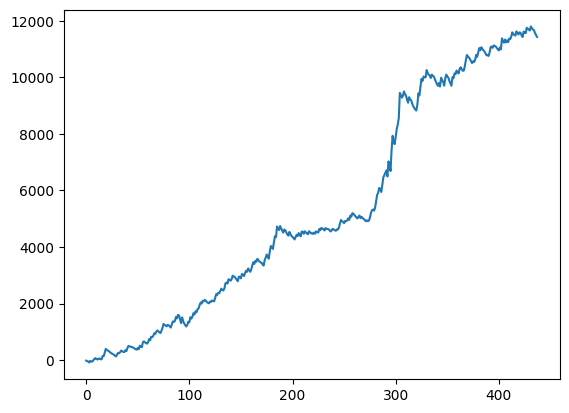

In [9]:
intraday_trade_log['PnL']=(intraday_trade_log['CE_Entry_Price']-intraday_trade_log['CE_Exit_Price'])
intraday_trade_log['PnL'].cumsum().plot()

In [10]:
insample_trade_log = intraday_trade_log[:int(len(intraday_trade_log)/2)]
outsample_trade_log = intraday_trade_log[int(len(intraday_trade_log)/2):]
insample_trade_log
outsample_trade_log


Entry_Datetime  Future_Traded_Price    ATM  Days_to_Expiry  \
217  2019-11-25 09:20:00             31144.95  31200               3   
218  2019-11-26 09:20:00             31684.00  31700               2   
219  2019-11-27 09:20:00             31802.10  31800               1   
220  2019-11-28 09:20:00             31924.00  31900               0   
221  2019-11-29 09:20:00             32087.90  32100               6   
..                   ...                  ...    ...             ...   
433  2020-10-14 09:20:00             23336.55  23400               1   
434  2020-10-15 09:20:00             23727.10  23700               0   
435  2020-10-16 09:20:00             23377.90  23300               6   
436  2020-10-19 09:20:00             23875.00  23800               3   
437  2020-10-20 09:20:00             24118.10  24100               2   

                       CE_Symbol  CE_Entry_Price  CE_Exit_Price  \
217  BANKNIFTY28NOV1931200CE.NFO          201.85         242.22   
218  BANKNIFTY28NOV1931700CE.NFO          185.55         222.66   
219  BANKNIFTY28NOV1931800CE.NFO          164.20         161.10   
220  BANKNIFTY28NOV1931900CE.NFO          109.90         131.88   
221  BANKNIFTY05DEC1932100CE.NFO          220.00         167.25   
..                           ...             ...            ...   
433  BANKNIFTY15OCT2023400CE.NFO          223.25         267.90   
434  BANKNIFTY15OCT2023700CE.NFO          132.00         158.40   
435  BANKNIFTY22OCT2023300CE.NFO          459.60         551.52   
436  BANKNIFTY22OCT2023800CE.NFO          391.20         469.44   
437  BANKNIFTY22OCT2024100CE.NFO          330.00         396.00   

        CE_Exit_Datetime                    PE_Symbol  PE_Entry_Price  \
217  2019-11-25 10:40:00  BANKNIFTY28NOV1931200PE.NFO          249.85   
218  2019-11-26 09:35:00  BANKNIFTY28NOV1931700PE.NFO          196.00   
219  2019-11-27 15:10:00  BANKNIFTY28NOV1931800PE.NFO          161.00   
220  2019-11-28 09:56:00  BANKNIFTY28NOV1931900PE.NFO           84.35   
221  2019-11-29 15:10:00  BANKNIFTY05DEC1932100PE.NFO          311.70   
..                   ...                          ...             ...   
433  2020-10-14 14:20:00  BANKNIFTY15OCT2023400PE.NFO          317.75   
434  2020-10-15 09:37:00  BANKNIFTY15OCT2023700PE.NFO          133.70   
435  2020-10-16 12:05:00  BANKNIFTY22OCT2023300PE.NFO          392.90   
436  2020-10-19 09:45:00  BANKNIFTY22OCT2023800PE.NFO          329.75   
437  2020-10-20 09:25:00  BANKNIFTY22OCT2024100PE.NFO          340.00   

     PE_Exit_Price     PE_Exit_Datetime    PnL  
217          73.60  2019-11-25 15:10:00 -40.37  
218         235.20  2019-11-26 10:42:00 -37.11  
219          90.60  2019-11-27 15:10:00   3.10  
220           0.20  2019-11-28 15:10:00 -21.98  
221         374.04  2019-11-29 11:43:00  52.75  
..             ...                  ...    ...  
433          55.70  2020-10-14 15:10:00 -44.65  
434         160.44  2020-10-15 13:45:00 -26.40  
435         471.48  2020-10-16 09:52:00 -91.92  
436         147.75  2020-10-19 15:10:00 -78.24  
437         205.75  2020-10-20 15:10:00 -66.00  

[218 rows x 13 columns]

In [11]:
initial_capital=200000
intraday_trade_log['Quantity']=25

In [12]:
intraday_trade_log['Entry_Price'] = intraday_trade_log['CE_Entry_Price']+intraday_trade_log['PE_Entry_Price']
intraday_trade_log['Exit_Price'] = intraday_trade_log['CE_Exit_Price']+intraday_trade_log['PE_Exit_Price']

In [13]:
intraday_trade_log['Entry_Including_Slippage'] = intraday_trade_log['Entry_Price'] -(intraday_trade_log['Entry_Price']*0.02) 
intraday_trade_log['Exit_Including_Slippage'] = intraday_trade_log['Exit_Price'] + (intraday_trade_log['Exit_Price']*0.02) 

In [14]:
intraday_trade_log['PnL_Including_Slippages'] = (intraday_trade_log['Entry_Including_Slippage']-intraday_trade_log['Exit_Including_Slippage'])*intraday_trade_log['Quantity']
intraday_trade_log

Entry_Datetime  Future_Traded_Price    ATM  Days_to_Expiry  \
0    2019-01-01 09:20:00             27265.00  27300               2   
1    2019-01-02 09:20:00             27437.90  27400               1   
2    2019-01-03 09:20:00             27218.90  27200               0   
3    2019-01-04 09:20:00             27188.45  27200               6   
4    2019-01-07 09:20:00             27530.00  27500               3   
..                   ...                  ...    ...             ...   
433  2020-10-14 09:20:00             23336.55  23400               1   
434  2020-10-15 09:20:00             23727.10  23700               0   
435  2020-10-16 09:20:00             23377.90  23300               6   
436  2020-10-19 09:20:00             23875.00  23800               3   
437  2020-10-20 09:20:00             24118.10  24100               2   

                       CE_Symbol  CE_Entry_Price  CE_Exit_Price  \
0    BANKNIFTY03JAN1927300CE.NFO          100.00         120.00   
1    BANKNIFTY03JAN1927400CE.NFO           99.05         118.86   
2    BANKNIFTY03JAN1927200CE.NFO           48.10          57.72   
3    BANKNIFTY10JAN1927200CE.NFO          179.60         215.52   
4    BANKNIFTY10JAN1927500CE.NFO          137.75          82.35   
..                           ...             ...            ...   
433  BANKNIFTY15OCT2023400CE.NFO          223.25         267.90   
434  BANKNIFTY15OCT2023700CE.NFO          132.00         158.40   
435  BANKNIFTY22OCT2023300CE.NFO          459.60         551.52   
436  BANKNIFTY22OCT2023800CE.NFO          391.20         469.44   
437  BANKNIFTY22OCT2024100CE.NFO          330.00         396.00   

        CE_Exit_Datetime                    PE_Symbol  PE_Entry_Price  \
0    2019-01-01 14:31:00  BANKNIFTY03JAN1927300PE.NFO          225.60   
1    2019-01-02 10:21:00  BANKNIFTY03JAN1927400PE.NFO          157.55   
2    2019-01-03 09:38:00  BANKNIFTY03JAN1927200PE.NFO          135.30   
3    2019-01-04 11:41:00  BANKNIFTY10JAN1927200PE.NFO          283.05   
4    2019-01-07 15:10:00  BANKNIFTY10JAN1927500PE.NFO          204.00   
..                   ...                          ...             ...   
433  2020-10-14 14:20:00  BANKNIFTY15OCT2023400PE.NFO          317.75   
434  2020-10-15 09:37:00  BANKNIFTY15OCT2023700PE.NFO          133.70   
435  2020-10-16 12:05:00  BANKNIFTY22OCT2023300PE.NFO          392.90   
436  2020-10-19 09:45:00  BANKNIFTY22OCT2023800PE.NFO          329.75   
437  2020-10-20 09:25:00  BANKNIFTY22OCT2024100PE.NFO          340.00   

     PE_Exit_Price     PE_Exit_Datetime    PnL  Quantity  Entry_Price  \
0           270.72  2019-01-01 09:54:00 -20.00        25       325.60   
1           189.06  2019-01-02 09:35:00 -19.81        25       256.60   
2           162.36  2019-01-03 11:36:00  -9.62        25       183.40   
3           339.66  2019-01-04 09:45:00 -35.92        25       462.65   
4           244.80  2019-01-07 14:45:00  55.40        25       341.75   
..             ...                  ...    ...       ...          ...   
433          55.70  2020-10-14 15:10:00 -44.65        25       541.00   
434         160.44  2020-10-15 13:45:00 -26.40        25       265.70   
435         471.48  2020-10-16 09:52:00 -91.92        25       852.50   
436         147.75  2020-10-19 15:10:00 -78.24        25       720.95   
437         205.75  2020-10-20 15:10:00 -66.00        25       670.00   

     Exit_Price  Entry_Including_Slippage  Exit_Including_Slippage  \
0        390.72                   319.088                 398.5344   
1        307.92                   251.468                 314.0784   
2        220.08                   179.732                 224.4816   
3        555.18                   453.397                 566.2836   
4        327.15                   334.915                 333.6930   
..          ...                       ...                      ...   
433      323.60                   530.180                 330.0720   
434      318.84           

In [15]:
intraday_trade_log['PnL_Including_Slippages_Cumulative_Sum'] = intraday_trade_log['PnL_Including_Slippages'].cumsum()
intraday_trade_log

Entry_Datetime  Future_Traded_Price    ATM  Days_to_Expiry  \
0    2019-01-01 09:20:00             27265.00  27300               2   
1    2019-01-02 09:20:00             27437.90  27400               1   
2    2019-01-03 09:20:00             27218.90  27200               0   
3    2019-01-04 09:20:00             27188.45  27200               6   
4    2019-01-07 09:20:00             27530.00  27500               3   
..                   ...                  ...    ...             ...   
433  2020-10-14 09:20:00             23336.55  23400               1   
434  2020-10-15 09:20:00             23727.10  23700               0   
435  2020-10-16 09:20:00             23377.90  23300               6   
436  2020-10-19 09:20:00             23875.00  23800               3   
437  2020-10-20 09:20:00             24118.10  24100               2   

                       CE_Symbol  CE_Entry_Price  CE_Exit_Price  \
0    BANKNIFTY03JAN1927300CE.NFO          100.00         120.00   
1    BANKNIFTY03JAN1927400CE.NFO           99.05         118.86   
2    BANKNIFTY03JAN1927200CE.NFO           48.10          57.72   
3    BANKNIFTY10JAN1927200CE.NFO          179.60         215.52   
4    BANKNIFTY10JAN1927500CE.NFO          137.75          82.35   
..                           ...             ...            ...   
433  BANKNIFTY15OCT2023400CE.NFO          223.25         267.90   
434  BANKNIFTY15OCT2023700CE.NFO          132.00         158.40   
435  BANKNIFTY22OCT2023300CE.NFO          459.60         551.52   
436  BANKNIFTY22OCT2023800CE.NFO          391.20         469.44   
437  BANKNIFTY22OCT2024100CE.NFO          330.00         396.00   

        CE_Exit_Datetime                    PE_Symbol  PE_Entry_Price  \
0    2019-01-01 14:31:00  BANKNIFTY03JAN1927300PE.NFO          225.60   
1    2019-01-02 10:21:00  BANKNIFTY03JAN1927400PE.NFO          157.55   
2    2019-01-03 09:38:00  BANKNIFTY03JAN1927200PE.NFO          135.30   
3    2019-01-04 11:41:00  BANKNIFTY10JAN1927200PE.NFO          283.05   
4    2019-01-07 15:10:00  BANKNIFTY10JAN1927500PE.NFO          204.00   
..                   ...                          ...             ...   
433  2020-10-14 14:20:00  BANKNIFTY15OCT2023400PE.NFO          317.75   
434  2020-10-15 09:37:00  BANKNIFTY15OCT2023700PE.NFO          133.70   
435  2020-10-16 12:05:00  BANKNIFTY22OCT2023300PE.NFO          392.90   
436  2020-10-19 09:45:00  BANKNIFTY22OCT2023800PE.NFO          329.75   
437  2020-10-20 09:25:00  BANKNIFTY22OCT2024100PE.NFO          340.00   

     PE_Exit_Price     PE_Exit_Datetime    PnL  Quantity  Entry_Price  \
0           270.72  2019-01-01 09:54:00 -20.00        25       325.60   
1           189.06  2019-01-02 09:35:00 -19.81        25       256.60   
2           162.36  2019-01-03 11:36:00  -9.62        25       183.40   
3           339.66  2019-01-04 09:45:00 -35.92        25       462.65   
4           244.80  2019-01-07 14:45:00  55.40        25       341.75   
..             ...                  ...    ...       ...          ...   
433          55.70  2020-10-14 15:10:00 -44.65        25       541.00   
434         160.44  2020-10-15 13:45:00 -26.40        25       265.70   
435         471.48  2020-10-16 09:52:00 -91.92        25       852.50   
436         147.75  2020-10-19 15:10:00 -78.24        25       720.95   
437         205.75  2020-10-20 15:10:00 -66.00        25       670.00   

     Exit_Price  Entry_Including_Slippage  Exit_Including_Slippage  \
0        390.72                   319.088                 398.5344   
1        307.92                   251.468                 314.0784   
2        220.08                   179.732                 224.4816   
3        555.18                   453.397                 566.2836   
4        327.15                   334.915                 333.6930   
..          ...                       ...                      ...   
433      323.60                   530.180                 330.0720   
434      318.84           

In [16]:
intraday_trade_log['Equity'] = 0
intraday_trade_log['Rate_of_Return'] = 0

In [17]:
for i in range(len(list(intraday_trade_log.index))):

    if i == 0:
        intraday_trade_log['Equity'].iloc[i] = initial_capital + intraday_trade_log['PnL_Including_Slippages'].iloc[i]
        intraday_trade_log['Rate_of_Return'].iloc[i] = (intraday_trade_log['PnL_Including_Slippages'].iloc[i]/initial_capital)*100
    else:
        intraday_trade_log['Equity'].iloc[i] = intraday_trade_log['Equity'].iloc[i-1] + intraday_trade_log['PnL_Including_Slippages'].iloc[i]
        intraday_trade_log['Rate_of_Return'].iloc[i] = (intraday_trade_log['PnL_Including_Slippages'].iloc[i]/intraday_trade_log['Equity'].iloc[i-1])*100

C:\Users\A\AppData\Local\Temp\ipykernel_10772\138033945.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intraday_trade_log['Equity'].iloc[i] = initial_capital + intraday_trade_log['PnL_Including_Slippages'].iloc[i]
C:\Users\A\AppData\Local\Temp\ipykernel_10772\138033945.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '198013.84' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_trade_log['Equity'].iloc[i] = initial_capital + intraday_trade_log['PnL_Including_Slippages'].iloc[i]
C:\Users\A\AppData\Local\Temp\ipykernel_10772\138033945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

In [18]:
intraday_trade_log

Entry_Datetime  Future_Traded_Price    ATM  Days_to_Expiry  \
0    2019-01-01 09:20:00             27265.00  27300               2   
1    2019-01-02 09:20:00             27437.90  27400               1   
2    2019-01-03 09:20:00             27218.90  27200               0   
3    2019-01-04 09:20:00             27188.45  27200               6   
4    2019-01-07 09:20:00             27530.00  27500               3   
..                   ...                  ...    ...             ...   
433  2020-10-14 09:20:00             23336.55  23400               1   
434  2020-10-15 09:20:00             23727.10  23700               0   
435  2020-10-16 09:20:00             23377.90  23300               6   
436  2020-10-19 09:20:00             23875.00  23800               3   
437  2020-10-20 09:20:00             24118.10  24100               2   

                       CE_Symbol  CE_Entry_Price  CE_Exit_Price  \
0    BANKNIFTY03JAN1927300CE.NFO          100.00         120.00   
1    BANKNIFTY03JAN1927400CE.NFO           99.05         118.86   
2    BANKNIFTY03JAN1927200CE.NFO           48.10          57.72   
3    BANKNIFTY10JAN1927200CE.NFO          179.60         215.52   
4    BANKNIFTY10JAN1927500CE.NFO          137.75          82.35   
..                           ...             ...            ...   
433  BANKNIFTY15OCT2023400CE.NFO          223.25         267.90   
434  BANKNIFTY15OCT2023700CE.NFO          132.00         158.40   
435  BANKNIFTY22OCT2023300CE.NFO          459.60         551.52   
436  BANKNIFTY22OCT2023800CE.NFO          391.20         469.44   
437  BANKNIFTY22OCT2024100CE.NFO          330.00         396.00   

        CE_Exit_Datetime                    PE_Symbol  PE_Entry_Price  ...  \
0    2019-01-01 14:31:00  BANKNIFTY03JAN1927300PE.NFO          225.60  ...   
1    2019-01-02 10:21:00  BANKNIFTY03JAN1927400PE.NFO          157.55  ...   
2    2019-01-03 09:38:00  BANKNIFTY03JAN1927200PE.NFO          135.30  ...   
3    2019-01-04 11:41:00  BANKNIFTY10JAN1927200PE.NFO          283.05  ...   
4    2019-01-07 15:10:00  BANKNIFTY10JAN1927500PE.NFO          204.00  ...   
..                   ...                          ...             ...  ...   
433  2020-10-14 14:20:00  BANKNIFTY15OCT2023400PE.NFO          317.75  ...   
434  2020-10-15 09:37:00  BANKNIFTY15OCT2023700PE.NFO          133.70  ...   
435  2020-10-16 12:05:00  BANKNIFTY22OCT2023300PE.NFO          392.90  ...   
436  2020-10-19 09:45:00  BANKNIFTY22OCT2023800PE.NFO          329.75  ...   
437  2020-10-20 09:25:00  BANKNIFTY22OCT2024100PE.NFO          340.00  ...   

       PnL Quantity  Entry_Price  Exit_Price  Entry_Including_Slippage  \
0   -20.00       25       325.60      390.72                   319.088   
1   -19.81       25       256.60      307.92                   251.468   
2    -9.62       25       183.40      220.08                   179.732   
3   -35.92       25       462.65      555.18                   453.397   
4    55.40       25       341.75      327.15                   334.915   
..     ...      ...          ...         ...                       ...   
433 -44.65       25       541.00      323.60                   530.180   
434 -26.40       25       265.70      318.84                   260.386   
435 -91.92       25       852.50     1023.00                   835.450   
436 -78.24       25       720.95      617.19                   706.531   
437 -66.00       25       670.00      601.75                   656.600   

     Exit_Including_Slippage  PnL_Including_Slippages  \
0                   398.5344                -1986.160   
1                   314.0784                -1565.260   
2                   224.4816                -1118.740   
3                   566.2836                -2822.165   
4                   333.6930                   30.550   
..                       ...                      ...   
433                 330.0720                 5002.700   
434                 325.2168                -1620.770   
4

In [19]:
win_rate = round(len(intraday_trade_log[intraday_trade_log['PnL_Including_Slippages']>0])/len(intraday_trade_log),2)
print(f'Win Rate:{win_rate}')

Win Rate:0.63


In [20]:
mean_win = intraday_trade_log[intraday_trade_log['PnL_Including_Slippages']>0]['PnL_Including_Slippages'].mean()
mean_loss = intraday_trade_log[intraday_trade_log['PnL_Including_Slippages']<0]['PnL_Including_Slippages'].mean()
risk_reward = abs(mean_win/mean_loss)
expectancy = round((win_rate*risk_reward) - ((1-win_rate)*1),2)

print(f'Expectancy:{expectancy}')

Expectancy:0.23


In [21]:
import numpy as np
number_of_trading_days_in_a_year = 252
risk_free_interest_rate = 5
mean = intraday_trade_log['Rate_of_Return'].mean() * number_of_trading_days_in_a_year - risk_free_interest_rate
sigma = intraday_trade_log['Rate_of_Return'].std() * np.sqrt(number_of_trading_days_in_a_year)
sharpe_ratio = round(mean/sigma,2)

print(f'Sharpe Ratio:{sharpe_ratio}')

Sharpe Ratio:2.81


In [22]:
downside_standard_deviation = intraday_trade_log[intraday_trade_log['Rate_of_Return']<0]['Rate_of_Return'].std() * np.sqrt(number_of_trading_days_in_a_year)
sortino_ratio = round(mean/downside_standard_deviation,2)
print(f'Sortino Ratio:{sortino_ratio}')

Sortino Ratio:4.07


In [23]:
intraday_trade_log['Drawdown'] = intraday_trade_log['PnL_Including_Slippages_Cumulative_Sum'] - intraday_trade_log['PnL_Including_Slippages_Cumulative_Sum'].cummax()
max_drawdown = round(intraday_trade_log['Drawdown'].min(),2)
print(f'Max Drawdown [Rs.] :{max_drawdown}')

max_drawdown_percent = round(max_drawdown/intraday_trade_log[intraday_trade_log['Drawdown'] == intraday_trade_log['Drawdown'].min()]['Equity'].iloc[0]*100,2)
print(f'Max Drawdown Percent:{max_drawdown_percent}')

Max Drawdown [Rs.] :-23432.6
Max Drawdown Percent:-7.05


In [24]:
intraday_trade_log['Recovery'] = 0
for i in range(len(intraday_trade_log)):
    if (intraday_trade_log['Drawdown'].iloc[i] < 0):
        intraday_trade_log['Recovery'].iloc[i] = intraday_trade_log['Recovery'].iloc[i-1] + 1
recovery_trades = intraday_trade_log['Recovery'].max()
print(f'Number of trades done from Drawdown to achieve a new peak: {recovery_trades}')



C:\Users\A\AppData\Local\Temp\ipykernel_10772\1759126011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intraday_trade_log['Recovery'].iloc[i] = intraday_trade_log['Recovery'].iloc[i-1] + 1
C:\Users\A\AppData\Local\Temp\ipykernel_10772\1759126011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intraday_trade_log['Recovery'].iloc[i] = intraday_trade_log['Recovery'].iloc[i-1] + 1
C:\Users\A\AppData\Local\Temp\ipykernel_10772\1759126011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

Number of trades done from Drawdown to achieve a new peak: 34


C:\Users\A\AppData\Local\Temp\ipykernel_10772\1759126011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intraday_trade_log['Recovery'].iloc[i] = intraday_trade_log['Recovery'].iloc[i-1] + 1
C:\Users\A\AppData\Local\Temp\ipykernel_10772\1759126011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intraday_trade_log['Recovery'].iloc[i] = intraday_trade_log['Recovery'].iloc[i-1] + 1
C:\Users\A\AppData\Local\Temp\ipykernel_10772\1759126011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [25]:
recovery_trades = intraday_trade_log['Recovery'].max()
print(f'Number of trades done from Drawdown to achieve a new peak: {recovery_trades}')

Number of trades done from Drawdown to achieve a new peak: 34


In [26]:

# intraday_trade_log_equity_high = intraday_trade_log[intraday_trade_log['Recovery'] == 0]
# intraday_trade_log_equity_high['number_days_between_equity_highs'] = pd.to_datetime(intraday_trade_log_equity_high['Entry_Datetime'] - intraday_trade_log_equity_high['Entry_Datetime'].shift())
# recovery_days = int(intraday_trade_log_equity_high['number_days_between_equity_highs'].apply(lambda x: x.days).max())
# print(f'Number of Days taken from Drawdown to achieve a new peak: {recovery_days}')   

intraday_trade_log_equity_high = intraday_trade_log[intraday_trade_log['Recovery'] == 0]

intraday_trade_log_equity_high['Entry_Datetime'] = pd.to_datetime(intraday_trade_log_equity_high['Entry_Datetime'])

intraday_trade_log_equity_high['number_days_between_equity_highs'] = intraday_trade_log_equity_high['Entry_Datetime'] - intraday_trade_log_equity_high['Entry_Datetime'].shift()

recovery_days = intraday_trade_log_equity_high['number_days_between_equity_highs'].apply(lambda x: x.days).max()

print(f'Number of Days taken from Drawdown to achieve a new peak: {recovery_days}')


C:\Users\A\AppData\Local\Temp\ipykernel_10772\626240894.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intraday_trade_log_equity_high['Entry_Datetime'] = pd.to_datetime(intraday_trade_log_equity_high['Entry_Datetime'])


Number of Days taken from Drawdown to achieve a new peak: 45.0


C:\Users\A\AppData\Local\Temp\ipykernel_10772\626240894.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intraday_trade_log_equity_high['number_days_between_equity_highs'] = intraday_trade_log_equity_high['Entry_Datetime'] - intraday_trade_log_equity_high['Entry_Datetime'].shift()


In [27]:

intraday_trade_log['Entry_Datetime'] = pd.to_datetime(intraday_trade_log['Entry_Datetime'])
number_of_trading_days_for_this_backtest = (intraday_trade_log.iloc[-1]['Entry_Datetime'].date() - intraday_trade_log.iloc[0]['Entry_Datetime'].date()).days
cagr = (((intraday_trade_log.iloc[-1]['Equity'] / initial_capital) ** (1 / (number_of_trading_days_for_this_backtest / 365))) - 1) * 100
cagr = round(cagr, 2)
print(f'CAGR: {cagr}%')


CAGR: 53.06%


In [28]:
calmar_ratio = round(abs(cagr/max_drawdown_percent),2)

print(f'Calmar Ratio:{calmar_ratio}')

Calmar Ratio:7.53


In [29]:
backtest_start_date = intraday_trade_log.iloc[0]['Entry_Datetime'].date()
backtest_start_date


datetime.date(2019, 1, 1)

In [30]:
backtest_end_date = intraday_trade_log.iloc[-1]['Entry_Datetime'].date()
backtest_end_date

datetime.date(2020, 10, 20)

In [31]:
number_of_trades = len(intraday_trade_log)
number_of_trades

435

In [32]:
number_of_wins = len(intraday_trade_log[intraday_trade_log['PnL_Including_Slippages']>0])
print(f'Number of Wins: {number_of_wins}')

number_of_losses = len(intraday_trade_log[intraday_trade_log['PnL_Including_Slippages']<0])
print(f'Number of Losses: {number_of_losses}')

Number of Wins: 274
Number of Losses: 161


In [33]:
average_profit_per_trade = round(intraday_trade_log[intraday_trade_log['PnL_Including_Slippages'] > 0]['PnL_Including_Slippages'].mean(),2)
print(f'Average Profit Per Trade: {average_profit_per_trade}')

average_loss_per_trade = round(intraday_trade_log[intraday_trade_log['PnL_Including_Slippages'] < 0]['PnL_Including_Slippages'].mean(),2)
print(f'Average Loss Per Trade: {average_loss_per_trade}')

Average Profit Per Trade: 2205.9
Average Loss Per Trade: -2320.46


In [34]:
max_pnl = round(intraday_trade_log['PnL_Including_Slippages'].max(),2)
print(f'Max PnL Point:{max_pnl}')

min_pnl = round(intraday_trade_log['PnL_Including_Slippages'].min(),2)
print(f'Min PnL Point:{min_pnl}')

Max PnL Point:20188.68
Min PnL Point:-14718.38


In [35]:
median_of_trade = round(intraday_trade_log['PnL_Including_Slippages'].median(),2)
print(f'Median:{median_of_trade}')

Median:748.13


In [36]:
gross_profit = intraday_trade_log[intraday_trade_log['PnL_Including_Slippages']>0]['PnL_Including_Slippages'].sum()
gross_loss = intraday_trade_log[intraday_trade_log['PnL_Including_Slippages']<0]['PnL_Including_Slippages'].sum()

profit_factor = round(abs(gross_profit/gross_loss),2)
print(f'Profit Factor:{profit_factor}')
# did't remove outlier profit factor

Profit Factor:1.62


In [37]:
outlier_adjusted_profit_factor = round(abs((gross_profit-max_pnl)/gross_loss),2)
print(f'Outlier Adjusted Profit Factor:{outlier_adjusted_profit_factor}')

Outlier Adjusted Profit Factor:1.56


In [38]:
intraday_trade_log['Continuous_Wins'] = 0
intraday_trade_log['Continuous_Losses'] = 0

In [39]:
for i in range(1,len(intraday_trade_log)):
    if intraday_trade_log['PnL_Including_Slippages'].iloc[i-1] > 0:
        intraday_trade_log['Continuous_Wins'].iloc[i] = intraday_trade_log['Continuous_Wins'].iloc[i-1]+1
    if intraday_trade_log['PnL_Including_Slippages'].iloc[i-1] < 0:
        intraday_trade_log['Continuous_Losses'].iloc[i] = intraday_trade_log['Continuous_Losses'].iloc[i-1]+1

C:\Users\A\AppData\Local\Temp\ipykernel_10772\1117506453.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intraday_trade_log['Continuous_Losses'].iloc[i] = intraday_trade_log['Continuous_Losses'].iloc[i-1]+1
C:\Users\A\AppData\Local\Temp\ipykernel_10772\1117506453.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intraday_trade_log['Continuous_Losses'].iloc[i] = intraday_trade_log['Continuous_Losses'].iloc[i-1]+1
C:\Users\A\AppData\Local\Temp\ipykernel_10772\1117506453.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

In [40]:
consecutive_wins = intraday_trade_log['Continuous_Wins'].max()
consecutive_losses = intraday_trade_log['Continuous_Losses'].max()
print(f'Consecutive Wins:{consecutive_wins}')
print(f'Consecutive Losses:{consecutive_losses}')

Consecutive Wins:13
Consecutive Losses:5


In [41]:
metrics = pd.DataFrame(columns=['Backtest Start Date','Backtest End Date','Number of Trades','Number of Wins','Number of Losses','Average Profit','Average Loss','Maximum Profit Points','Maximum Loss Points','Median Trade','Win Rate','Expectancy','Sharpe Ratio','Sortino Ratio','Max Drawdown','Max Drawdown Percent','Days Taken to Recover From Drawdown','Number of Trades to Recover From Drawdown','Calmar','CAGR','Consecutive Wins','Consecutive Losses','Profit Factor (Amount of Profit per unit of Loss)','Outlier Adjusted Profit Factor (Profit Factor except that One Exceptional Biggest Winner)'])

In [42]:
import pandas as pd

metrics_data = []

metrics_dict = {
    'Backtest Start Date': backtest_start_date,
    'Backtest End Date': backtest_end_date,
    'Number of Trades': number_of_trades,
    'Number of Wins': number_of_wins,
    'Number of Losses': number_of_losses,
    'Average Profit': average_profit_per_trade,
    'Average Loss': average_loss_per_trade,
    'Maximum Profit Points': max_pnl,
    'Maximum Loss Points': min_pnl,
    'Median Trade': median_of_trade,
    'Win Rate': win_rate,
    'Expectancy': expectancy,
    'Sharpe Ratio': sharpe_ratio,
    'Sortino Ratio': sortino_ratio,
    'Max Drawdown': max_drawdown,
    'Max Drawdown Percent': max_drawdown_percent,
    'Days Taken to Recover From Drawdown': recovery_days,
    'Number of Trades to Recover From Drawdown': recovery_trades,
    'Calmar': calmar_ratio,
    'CAGR': cagr,
    'Consecutive Wins': consecutive_wins,
    'Consecutive Losses': consecutive_losses,
    'Profit Factor (Amount of Profit per unit of Loss)': profit_factor,
    'Outlier Adjusted Profit Factor (Profit Factor except that One Exceptional Biggest Winner)': outlier_adjusted_profit_factor
}

metrics_data.append(metrics_dict)

metrics = pd.DataFrame(metrics_data)


In [43]:
metrics.T

0
Backtest Start Date                                 2019-01-01
Backtest End Date                                   2020-10-20
Number of Trades                                           435
Number of Wins                                             274
Number of Losses                                           161
Average Profit                                          2205.9
Average Loss                                          -2320.46
Maximum Profit Points                                 20188.68
Maximum Loss Points                                  -14718.38
Median Trade                                            748.13
Win Rate                                                  0.63
Expectancy                                                0.23
Sharpe Ratio                                              2.81
Sortino Ratio                                             4.07
Max Drawdown                                          -23432.6
Max Drawdown Percent                                     -7.05
Days Taken to Recover From Drawdown                       45.0
Number of Trades to Recover From Drawdown                   34
Calmar                                                    7.53
CAGR                                                     53.06
Consecutive Wins                                            13
Consecutive Losses                                           5
Profit Factor (Amount of Profit per unit of Loss)         1.62
Outlier Adjusted Profit Factor (Profit Factor e...        1.56

In [44]:
returns = intraday_trade_log[['Entry_Datetime','Equity']]
returns.set_index('Entry_Datetime',inplace=True)
returns = returns.resample('M').last()
returns['%Change'] = returns['Equity'].pct_change()*100
returns.reset_index(inplace=True)
returns['Year'] = returns['Entry_Datetime'].apply(lambda x: x.year)
returns['Month'] = returns['Entry_Datetime'].apply(lambda x: x.month)
import calendar
returns['Month'] = returns['Month'].apply(lambda x: calendar.month_abbr[x])
returns = returns[['Entry_Datetime', '%Change', 'Year', 'Month']]
x = returns.groupby(['Year','Month'])['%Change'].mean()
broad_returns = x.unstack()
broad_returns['Total'] = broad_returns[broad_returns.columns].sum(axis=1)
broad_returns = broad_returns[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Total']]
broad_returns = round(broad_returns,2)
broad_returns

Month   Jan   Feb    Mar   Apr   May   Jun   Jul   Aug    Sep   Oct   Nov  \
Year                                                                        
2019    NaN  3.76  11.74  3.66 -1.56  6.35  6.91  2.95  10.69  3.86  6.02   
2020   1.68 -0.15  13.79  3.13  1.93  3.19  0.77  3.88  -3.68  0.94   NaN   

Month   Dec  Total  
Year                
2019   1.57  55.96  
2020    NaN  25.47

In [45]:
import seaborn as sns

# Create a colormap
cm = sns.light_palette('green', as_cmap=True)

# Apply background gradient and highlighting to the DataFrame
broad_returns_image = broad_returns.style.background_gradient(cmap=cm, axis=0)\
    .highlight_min(axis=0, color='lightgreen')\
    .highlight_max(axis=0, color='green')\
    .format('{:.2f}')

# You can display the styled DataFrame
broad_returns_image


In [46]:
intraday_trade_log['Date']=intraday_trade_log['Entry_Datetime'].apply(lambda x: x.date())
drawdown_values = intraday_trade_log['Drawdown'].drop_duplicates().nsmallest(5)
drawdown_df = intraday_trade_log[intraday_trade_log['Drawdown'].isin(list(drawdown_values.values))].copy()

In [47]:

drawdown_figure = plt.figure(figsize=(20,8))
plt.plot(intraday_trade_log['Date'],intraday_trade_log['Equity'])
plt.scatter(drawdown_df['Date'],drawdown_df['Equity'],color='black')

In [48]:
returns['Month-Year'] = returns.apply(lambda x: (str(x['Month']) + ' ' + str(x['Year'])[-2:]).upper(),axis=1)
plt.figure(figsize=(20,8))
sns.barplot(x='Month-Year',y='%Change',data=returns,estimator=np.median,ci=0)

C:\Users\A\AppData\Local\Temp\ipykernel_10772\3660207170.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x='Month-Year',y='%Change',data=returns,estimator=np.median,ci=0)
C:\Users\A\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\A\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\A\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) in

<Axes: xlabel='Month-Year', ylabel='%Change'>

In [49]:
metrics.T


0
Backtest Start Date                                 2019-01-01
Backtest End Date                                   2020-10-20
Number of Trades                                           435
Number of Wins                                             274
Number of Losses                                           161
Average Profit                                          2205.9
Average Loss                                          -2320.46
Maximum Profit Points                                 20188.68
Maximum Loss Points                                  -14718.38
Median Trade                                            748.13
Win Rate                                                  0.63
Expectancy                                                0.23
Sharpe Ratio                                              2.81
Sortino Ratio                                             4.07
Max Drawdown                                          -23432.6
Max Drawdown Percent                                     -7.05
Days Taken to Recover From Drawdown                       45.0
Number of Trades to Recover From Drawdown                   34
Calmar                                                    7.53
CAGR                                                     53.06
Consecutive Wins                                            13
Consecutive Losses                                           5
Profit Factor (Amount of Profit per unit of Loss)         1.62
Outlier Adjusted Profit Factor (Profit Factor e...        1.56

In [50]:
broad_returns_image

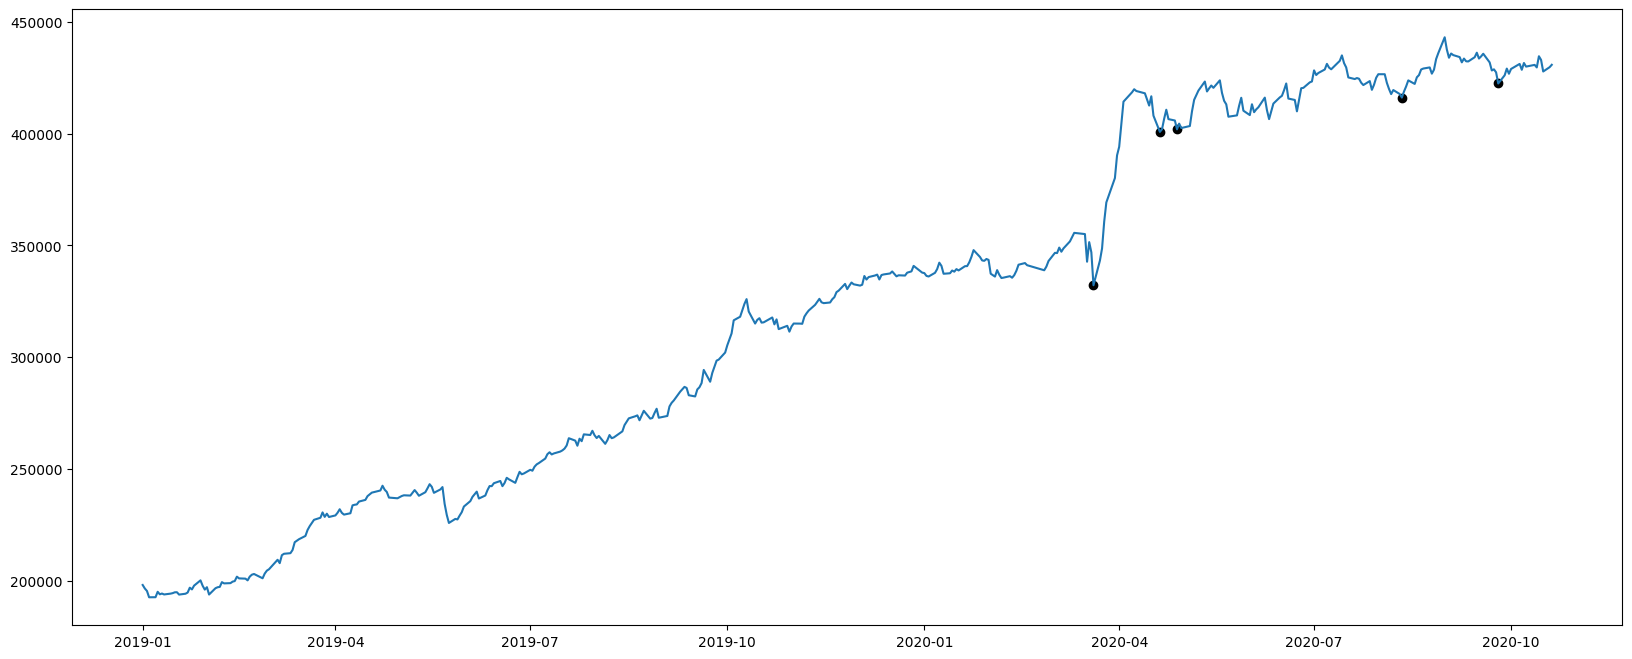

In [51]:
drawdown_figure
